In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [63]:
df= pd.read_csv('32_Murder_victim_age_sex.csv')
df.head()

,Area_Name,Year,Group_Name,Sub_Group_Name,Victims_Above_50_Yrs,Victims_Total,Victims_Upto_10_15_Yrs,Victims_Upto_10_Yrs,Victims_Upto_15_18_Yrs,Victims_Upto_18_30_Yrs,Victims_Upto_30_50_Yrs
0,Andaman & Nicobar Islands,2001,Murder - Female Victims,2. Female Victims,NaN,6,NaN,NaN,NaN,4.0,2.0
1,Andhra Pradesh,2001,Murder - Female Victims,2. Female Victims,67.0,607,15.0,38.0,43.0,269.0,175.0
2,Arunachal Pradesh,2001,Murder - Female Victims,2. Female Victims,2.0,16,0.0,0.0,0.0,10.0,4.0
3,Assam,2001,Murder - Female Victims,2. Female Victims,11.0,128,8.0,4.0,23.0,45.0,37.0
4,Bihar,2001,Murder - Female Victims,2. Female Victims,12.0,366,0.0,0.0,40.0,191.0,123.0


In [76]:
#Making a count of all the null values, column wise
null_val=df.isnull().sum()
null_val

Area_Name                   0
Year                        0
Group_Name                  0
Sub_Group_Name              0
Victims_Above_50_Yrs       56
Victims_Total               0
Victims_Upto_10_15_Yrs    142
Victims_Upto_10_Yrs       118
Victims_Upto_15_18_Yrs    130
Victims_Upto_18_30_Yrs      9
Victims_Upto_30_50_Yrs     11
dtype: int64

#Separating the Quantitative Columns from the Categorical 
num_col=df.iloc[:,4:-1]
num_col

In [105]:
#Separating the Quantitative Columns from the Categorical 
num_col=df.iloc[:,4:-1] 
num_col.head()

,Victims_Above_50_Yrs,Victims_Total,Victims_Upto_10_15_Yrs,Victims_Upto_10_Yrs,Victims_Upto_15_18_Yrs,Victims_Upto_18_30_Yrs
0,NaN,6,NaN,NaN,NaN,4.0
1,67.0,607,15.0,38.0,43.0,269.0
2,2.0,16,0.0,0.0,0.0,10.0
3,11.0,128,8.0,4.0,23.0,45.0
4,12.0,366,0.0,0.0,40.0,191.0


In [124]:

first_four=df.iloc[:,:4]
first_four

,Area_Name,Year,Group_Name,Sub_Group_Name
0,Andaman & Nicobar Islands,2001,Murder - Female Victims,2. Female Victims
1,Andhra Pradesh,2001,Murder - Female Victims,2. Female Victims
2,Arunachal Pradesh,2001,Murder - Female Victims,2. Female Victims
3,Assam,2001,Murder - Female Victims,2. Female Victims
4,Bihar,2001,Murder - Female Victims,2. Female Victims
...,...,...,...,...
1013,Tamil Nadu,2010,Murder - Total Victims,3. Total
1014,Tripura,2010,Murder - Total Victims,3. Total
1015,Uttar Pradesh,2010,Murder - Total Victims,3. Total
1016,Uttarakhand,2010,Murder - Total Victims,3. Total


In [85]:
key=['Victims_Above_50_Yrs','Victims_Total', 'Victims_Upto_10_15_Yrs',
     'Victims_Upto_10_Yrs', 'Victims_Upto_15_18_Yrs','Victims_Upto_18_30_Yrs']
value=[56,0,142,118,130,9]
New_Colors = ['green','blue','purple','brown','teal']

([0, 1, 2, 3, 4, 5], <a list of 6 Text xticklabel objects>)

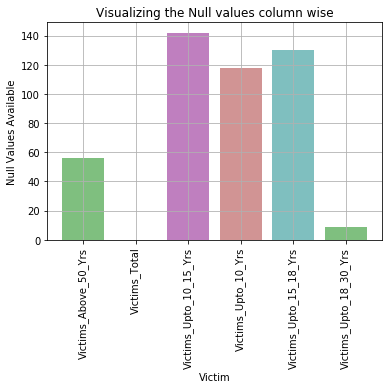

In [86]:
plt.bar(key, value, color = New_Colors, alpha=0.5)
plt.title('Visualizing the Null values column wise')
plt.xlabel('Victim')
plt.ylabel('Null Values Available')
plt.grid()
plt.xticks(rotation=90)

In [98]:
#1)Removing all the Null Values Present in Table
rem_null=num_col.dropna()
rem_null.shape



(834, 6)

In [99]:
#Null Val Remain
rem_null.isnull().sum()


Victims_Above_50_Yrs      0
Victims_Total             0
Victims_Upto_10_15_Yrs    0
Victims_Upto_10_Yrs       0
Victims_Upto_15_18_Yrs    0
Victims_Upto_18_30_Yrs    0
dtype: int64

In [109]:
from sklearn.impute import SimpleImputer
imputer= SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(num_col) 
df2 = pd.DataFrame(imputer.transform(num_col)) #As SimpleImputer returns an Array, converting the array back to DataFrame 
df2

,0,1,2,3,4,5
0,67.559252,6.0,9.53653,14.726667,17.326577,4.0
1,67.000000,607.0,15.00000,38.000000,43.000000,269.0
2,2.000000,16.0,0.00000,0.000000,0.000000,10.0
3,11.000000,128.0,8.00000,4.000000,23.000000,45.0
4,12.000000,366.0,0.00000,0.000000,40.000000,191.0
...,...,...,...,...,...,...
1013,327.000000,1908.0,13.00000,63.000000,16.000000,650.0
1014,24.000000,159.0,2.00000,0.000000,0.000000,60.0
1015,344.000000,4456.0,82.00000,138.000000,126.000000,2358.0
1016,19.000000,176.0,1.00000,14.726667,2.000000,91.0


ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: 'Andaman & Nicobar Islands'

,Victims_Above_50_Yrs,Victims_Total,Victims_Upto_10_15_Yrs,Victims_Upto_10_Yrs,Victims_Upto_15_18_Yrs,Victims_Upto_18_30_Yrs
0,NaN,6,NaN,NaN,NaN,4.0
1,67.0,607,15.0,38.0,43.0,269.0
2,2.0,16,0.0,0.0,0.0,10.0
3,11.0,128,8.0,4.0,23.0,45.0
4,12.0,366,0.0,0.0,40.0,191.0
...,...,...,...,...,...,...
1013,327.0,1908,13.0,63.0,16.0,650.0
1014,24.0,159,2.0,0.0,0.0,60.0
1015,344.0,4456,82.0,138.0,126.0,2358.0
1016,19.0,176,1.0,NaN,2.0,91.0


In [116]:
df2.rename(columns= {0:'Victims_Above_50_Yrs', 1:'Victims_Total',2:'Victims_Upto_10_15_Yrs', 3:'Victims_Upto_10_Yrs', 4:'Victims_Upto_15_18_Yrs',5:'Victims_Upto_18_30_Yrs'}, inplace = True))

SyntaxError: invalid syntax (<ipython-input-116-dba8d44476ed>, line 1)

In [122]:
#Renaming the Column name
X=pd.DataFrame(df2)
X.columns= ['Victims_Above_50_Yrs', 'Victims_Total', 'Victims_Upto_10_15_Yrs', 'Victims_Upto_10_Yrs', 'Victims_Upto_15_18_Yrs', 'Victims_Upto_18_30_Yrs']

In [134]:
X.head()

,Victims_Above_50_Yrs,Victims_Total,Victims_Upto_10_15_Yrs,Victims_Upto_10_Yrs,Victims_Upto_15_18_Yrs,Victims_Upto_18_30_Yrs
0,67.559252,6.0,9.53653,14.726667,17.326577,4.0
1,67.000000,607.0,15.00000,38.000000,43.000000,269.0
2,2.000000,16.0,0.00000,0.000000,0.000000,10.0
3,11.000000,128.0,8.00000,4.000000,23.000000,45.0
4,12.000000,366.0,0.00000,0.000000,40.000000,191.0


In [133]:
#Combing the data X and Categorical Values, which were separated in the begining 
final_dataset= pd.concat([first_four, X], axis=1)
final_dataset.head()

,Area_Name,Year,Group_Name,Sub_Group_Name,Victims_Above_50_Yrs,Victims_Total,Victims_Upto_10_15_Yrs,Victims_Upto_10_Yrs,Victims_Upto_15_18_Yrs,Victims_Upto_18_30_Yrs
0,Andaman & Nicobar Islands,2001,Murder - Female Victims,2. Female Victims,67.559252,6.0,9.53653,14.726667,17.326577,4.0
1,Andhra Pradesh,2001,Murder - Female Victims,2. Female Victims,67.000000,607.0,15.00000,38.000000,43.000000,269.0
2,Arunachal Pradesh,2001,Murder - Female Victims,2. Female Victims,2.000000,16.0,0.00000,0.000000,0.000000,10.0
3,Assam,2001,Murder - Female Victims,2. Female Victims,11.000000,128.0,8.00000,4.000000,23.000000,45.0
4,Bihar,2001,Murder - Female Victims,2. Female Victims,12.000000,366.0,0.00000,0.000000,40.000000,191.0


In [132]:
#Exporting the dataset to a CSV
final_dataset.to_csv('Crime_Rate.csv')